# Принятие решений в бизнесе

Цель проекта: увеличение выручки крупного интернет-магазина.

Для достижения цели необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
 
 **Часть1** 
 
 *Приоритизация гипотез*
 
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2**

*Анализ A/B-теста*

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста.

**Описание данных**

Данные для первой части 

Файл /datasets/hypothesis.csv. Скачать датасет

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.





Данные для второй части

Файл /datasets/orders.csv. Скачать датасет

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных и подготовка их к анализу

In [383]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np


In [384]:
pd.options.display.max_colwidth = 100

In [385]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [386]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [387]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [388]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Приведем их к нижнему регистру датафрейм hypothesis

In [389]:
hypothesis.columns = hypothesis.columns.str.lower()

In [390]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Проверим тип данных

In [391]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [392]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [393]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Неверный тип данных приведен в колонке date датафреймов visitors и orders.

In [394]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [395]:
orders['date'] = pd.to_datetime(orders['date'])

In [396]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [397]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим наличие пропусков

In [398]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [399]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [400]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропуски отсутствуют

Проверим на наличие явных дубликатов

In [401]:
hypothesis.duplicated().sum()

0

In [402]:
visitors.duplicated().sum()

0

In [403]:
orders.duplicated().sum()

0

Проверим на наличие неполных дубликатов

In [404]:
hypothesis['duplicates'] =hypothesis.duplicated(keep=False)
print(hypothesis)

                                                                                            hypothesis  \
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                             

In [405]:
orders['duplicates'] = orders.duplicated(keep=False)
print(orders)

      transactionId   visitorId       date  revenue group  duplicates
0        3667963787  3312258926 2019-08-15     1650     B       False
1        2804400009  3642806036 2019-08-15      730     B       False
2        2961555356  4069496402 2019-08-15      400     A       False
3        3797467345  1196621759 2019-08-15     9759     B       False
4        2282983706  2322279887 2019-08-15     2308     B       False
...             ...         ...        ...      ...   ...         ...
1192     2662137336  3733762160 2019-08-14     6490     B       False
1193     2203539145   370388673 2019-08-14     3190     A       False
1194     1807773912   573423106 2019-08-14    10550     A       False
1195     1947021204  1614305549 2019-08-14      100     A       False
1196     3936777065  2108080724 2019-08-15   202740     B       False

[1197 rows x 6 columns]


In [406]:
orders.query('duplicates == "True"')

,transactionId,visitorId,date,revenue,group,duplicates


In [407]:
visitors['duplicates'] = visitors.duplicated(keep=False)
print(visitors)

         date group  visitors  duplicates
0  2019-08-01     A       719       False
1  2019-08-02     A       619       False
2  2019-08-03     A       507       False
3  2019-08-04     A       717       False
4  2019-08-05     A       756       False
..        ...   ...       ...         ...
57 2019-08-27     B       720       False
58 2019-08-28     B       654       False
59 2019-08-29     B       531       False
60 2019-08-30     B       490       False
61 2019-08-31     B       718       False

[62 rows x 4 columns]


In [408]:
visitors.query('duplicates == "True"')

,date,group,visitors,duplicates


Неполные дубликаты отсутствуют

Проверим на наличие неявных дубликатов

In [409]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Неявные дубликаты отсутствуют

В ходе проведенной преобработки информации нименования столбцов в датафрейме hypothesis приведены к нижнему регистру, тип данных заменен в колонке date датафреймов visitors и orders. Пропуски и дубликаты отсутствуют.

In [410]:
orders['group'].value_counts() 

B    640
A    557
Name: group, dtype: int64

В таблице о заказах рразница в количестве пользователей составляет 15 %. Количество групп совпадает.

In [411]:
print('Дата начала теста:', orders['date'].min())
      
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


Длительность теста - с 01.08 по 31.08

Вероятность попадания пользователей в обе группы - по таблице с заказами

In [412]:
uniq_users = orders.groupby(['visitorId']).agg({'group' : 'nunique', 'transactionId' : 'count', 'revenue' : 'sum'})\
.reset_index()
print(f"Количество пользователей, попавших в обе группы: {uniq_users[uniq_users['group'] != 1]['visitorId'].count()}")

Количество пользователей, попавших в обе группы: 58


Количество пользователей, попавших в обе группы: 58, это 4,8 % от общего количества пользователей в обеих группах, на дальнейший анализ это не должно повлиять.

### Приоритизация гипотез

#### Применим фреймворк ICE для приоритизации гипотез

In [413]:
print(hypothesis)
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 2) 
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                            hypothesis  \
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                             

Наиболее перспективными гипотезы по ICE: 

"Запустить акцию, дающую скидку на товар в день рождения", 

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",

"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек". 

Рассмотрим подробнее гипотезу 8 "Запустить акцию, дающую скидку на товар в день рождения".У компонентов impact и confidence - почти максимальные показатели, данные компоненты показывают, насколько вы уверены в оценках других параметров и насколько сильно изменение повлияет на охваченных пользователей.
компонет efforts - отвечает за стоимость проведения - он средний, например, организовать рекламную рассылку или добавить привлекательный баннер на сайт, сообщающий об акции, не предролагает больших затрат.

#### Применим фреймворк RICE для приоритизации гипотез

In [414]:
print(hypothesis)
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                            hypothesis  \
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                             

Из полученного результата можно наблюдать то, что наиболее перспективные гипотезы по RICE:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", 

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек", 

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 

"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию", 

"Запустить акцию, дающую скидку на товар в день рождения".

Разберем также гипотезу 8 "Запустить акцию, дающую скидку на товар в день рождения". В данном случае Reach = 1, что меньше, чем у остальных гипотез.Параметр Reach отчечает за охват пользователей.

#### Изменение приоритизации гипотез при применении RICE вместо ICE

При приминении RICE вместо ICE гипотеза 8 переместилась на последнее место пятерки перспективных гипотез, гипотеза 2 вышла на второе место, 0 гипотеза поднялась выше на одну позицию, место гипотезы 6 осталось неизменным. Изменения приоритизации  объясняются тем, что в случае фреймворка ICE  не учитывался охват пользователей Reach в отличие от RICE, в то время как это важная составляющая оценки гипотез.

### Анализ A/B-теста

#### Построим график кумулятивной выручки по группам

Cоздадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [415]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(

    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({

'date' : 'max',

'group' : 'max',

'transactionId' : pd.Series.nunique,

'visitorId' : pd.Series.nunique,

'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(

    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({

'date' : 'max',

'group' : 'max',

'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединям полученные таблицы по дате и группе 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#выведем полученную таблицу
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [416]:
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())
print(ordersAggregated['date'].min())
print(ordersAggregated['date'].max())
print(visitorsAggregated['date'].min())
print(visitorsAggregated['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Даты совпали

Построим графики кумулятивной выручки по дням по группам.

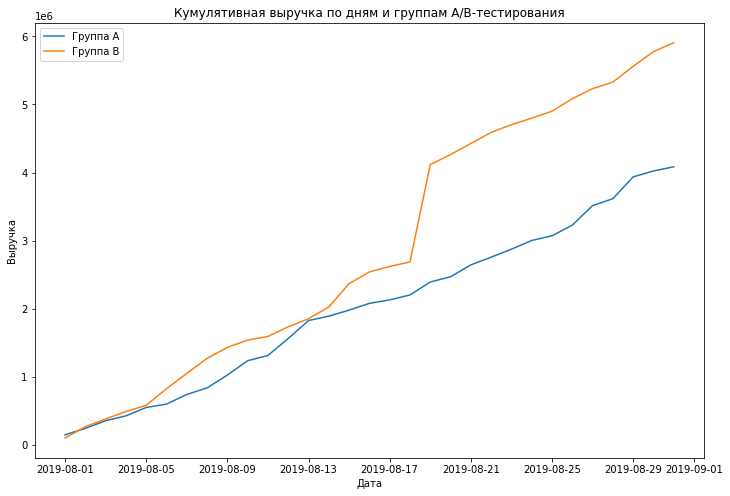

In [417]:
#зададим размеры графика 
plt.figure(figsize=(12,8))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show() 

Исходя из графика, можно сказать, что группа B лидирирует на всём периоде у группы B произошёл резкий рост в период с 18 на 19 августа, это может быть связано с тем, что с 18 по 19 было очень много заказов, либо в группу попал анамально дорогой заказ.


Построим графики для группы B с изменение количества заказов и выручки

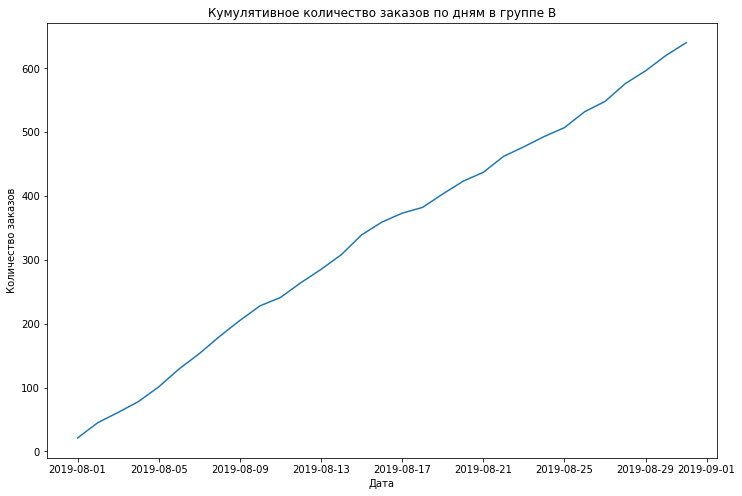

In [418]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Количество заказов') 
plt.title('Кумулятивное количество заказов по дням в группе B')
plt.show() 

График с количеством заказов ровный, скачков нет

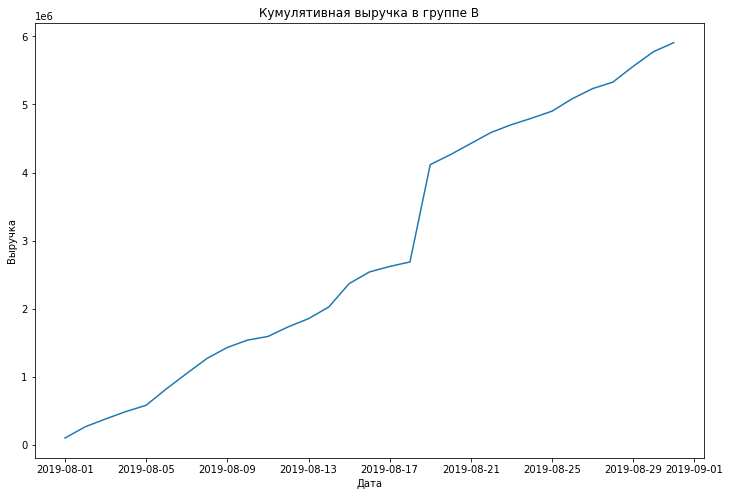

In [419]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка в группе B')
plt.show() 

Из графика с выручкой можно сделать вывод о том, что в группу попал анамально большой заказ.

#### Построим график кумулятивного среднего чека по группам

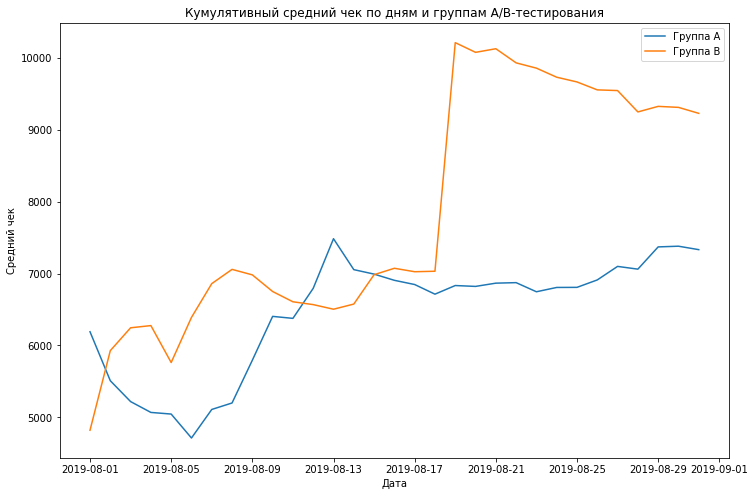

In [420]:
#зададим размеры графика  
plt.figure(figsize=(12,8))   

#построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show()  

В первой половине теста графики достаточно изменчивы, наблюдаются и рост и падения в обеих группах.
На графике среднего чека анамальное значения для группы B в период с 08.17 по 08.21, уже более явное
к коцу периода коммулятивный средний чек группы B, выше, чем у А, скорее всего это связано с попаданием анамально большого заказа, к концу периода у группы А есть тенденция к росту, а у B к снижению.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

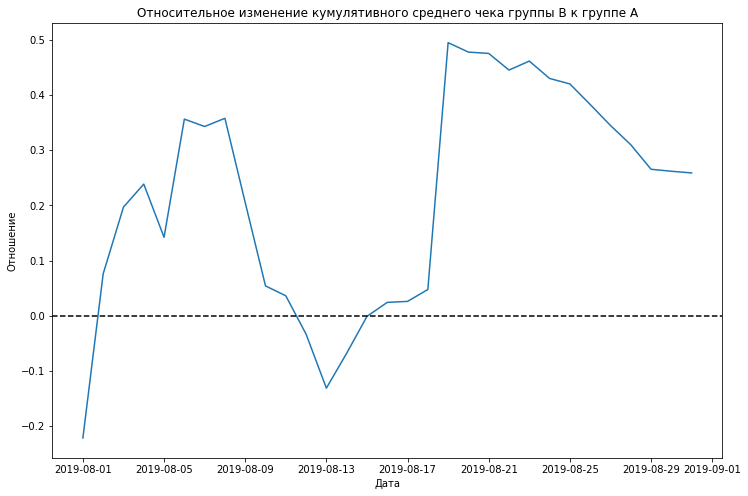

In [421]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
# зададим размеры графика  
plt.figure(figsize=(12,8))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()   

На графике наблюдаются резкие колебания, возможно, это связано с тем, что именно в пиковый дни на графике, были сделаны анамально дорогие заказы.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам

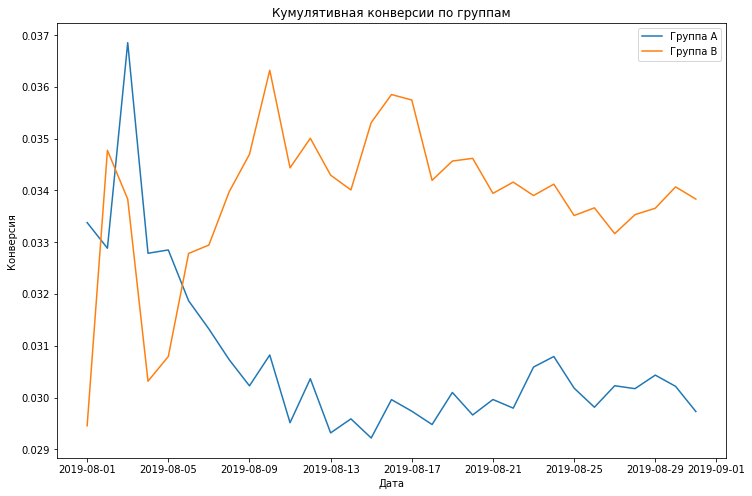

In [422]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show()  

На грфике видно, что до 5 августа конверсия у группы А была выше, чем у В, но спустя 6 дней со времени запуска теста ситуация изменилась: для А конверсия держалась на уровне от 0.029 до 0.031, для B от 0.034 до 0.036.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

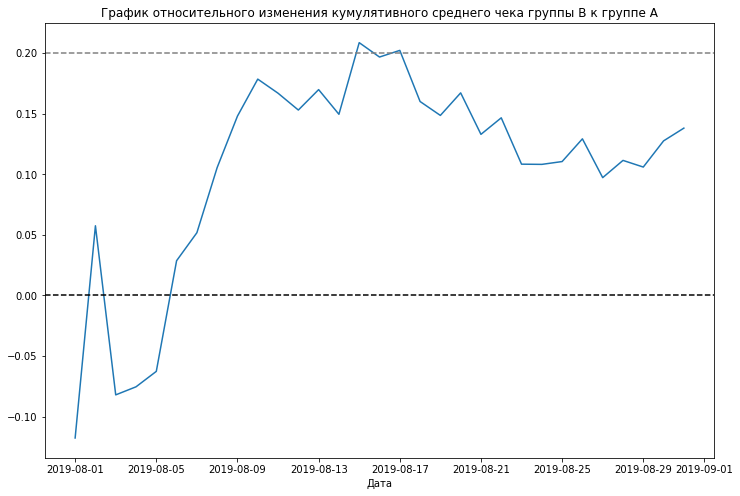

In [423]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы  
merged_сonversion = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
# зададим размеры графика  
plt.figure(figsize=(12,8))   

plt.plot(merged_сonversion['date'],
         merged_сonversion['conversion_b']/
         merged_сonversion['conversion_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.xlabel('Дата') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.show()

Исходя из графика видно, что в начале теста конверсия колебалась, но на 6-й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода.

#### Построим точечный график количества заказов по пользователям

In [424]:
#создадим сводную таблицу с количеством закзазов для каждого пользователя 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
#переименуем столбцы 
ordersByUsers.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов 
ordersByUsers.sort_values(by='orders', ascending=False).head(10) 



,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


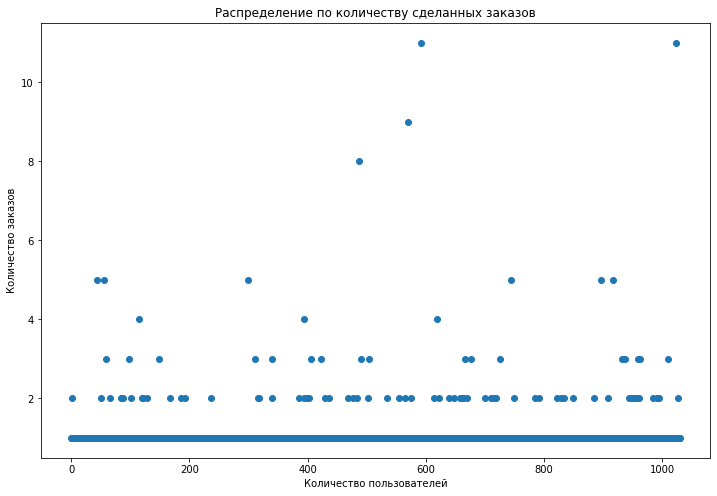

In [425]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers 
x_values = pd.Series(range(0, len(ordersByUsers)))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values, ordersByUsers['orders'])  
# зададим описание графика 
plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по количеству сделанных заказов') 
plt.show() 

Наибольшее количество пользователей с 1 и 2 заказами, остальные довольно редкие, наиболее редкое явление - это 11 заказов.

#### Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [426]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Результат:

не более 5 % совершили больше 2-ух заказов
не более 1 % совершили больше 4-ёх заказов
Устанавливаем границу по колличеству заказов на пользователя в 3 шт., заключим её в переменную:

In [427]:
orders_user = 3 

#### Построим точечный график стоимостей заказов

In [428]:
orders[['visitorId', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitorId,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


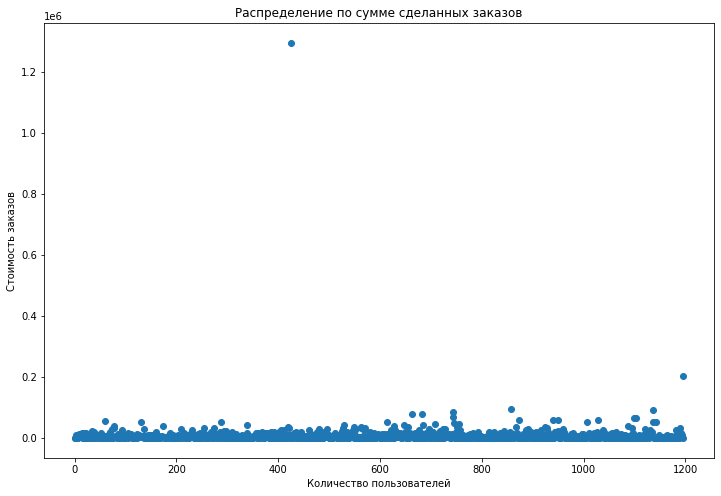

In [429]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

Можно заметить, что есть выброс максимально выше 1.2 млн. Поставим ограничение 100 000.

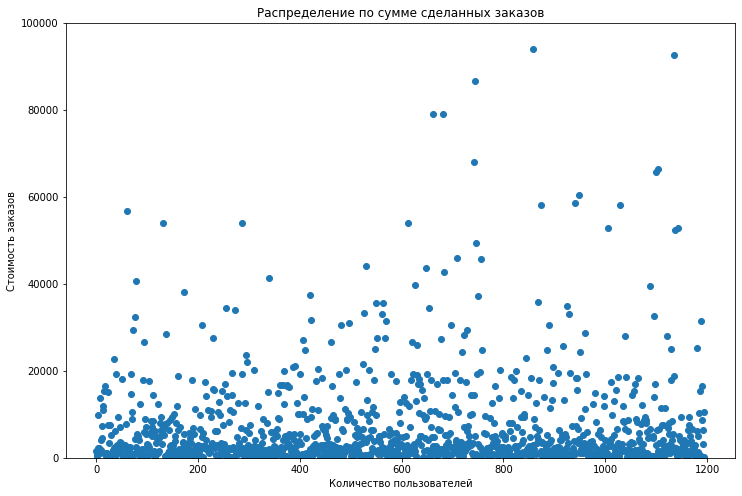

In [430]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8))
#построим график 
plt.scatter(x_values, orders['revenue'])
#срежем очевидно анамальные заказы 
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

Основные значения лежат в пределах до 20000, по графику всё ещё сложно найти границу анамально большого заказа.

#### Расчет 95-й и 99-й перцентили стоимости заказов.Оценка границы для определения аномальных заказов.

In [431]:
print(np.percentile(orders['revenue'], [95, 99]))   

[28000.  58233.2]


Результат:

не более 5 % заказов стомостью более 28000 рублей
не более 1 % заказов стомостью более 58233 рублей
Устанавливаем границу по сумме заказа в 30000 рублей, добавим её в переменную:

In [432]:
border_order  = 30000

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [433]:
visitors.head(2)

,date,group,visitors,duplicates
0,2019-08-01,A,719,False
1,2019-08-02,A,619,False


In [434]:
orders.head(2)

,transactionId,visitorId,date,revenue,group,duplicates
0,3667963787,3312258926,2019-08-15,1650,B,False
1,2804400009,3642806036,2019-08-15,730,B,False


In [435]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим всё в одну таблицу:

In [436]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
14,2019-08-15,15,88205,31,342499,283,1979057,339,2367945,628,544,9686,9600
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.

Альтернативная гипотеза:статистически значимые различия есть.

In [437]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                               name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет; 

Альтернативная гипотеза: статистически значимые различия есть.

In [438]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                                    orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}"\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Не получается отвергнуть нулевую гипотезу, в среднем чеке есть различия. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B выше среднего чека группы A на 26%.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным 

Вспомним - из предыдущих пунктов мы приняли за аномальных пользователей тех, кто совершил больше 3 заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [439]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Количество пользователей, имеющих анамальные значения =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Количество пользователей, имеющих анамальные значения = 31


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [440]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 
# sampleAFiltered.value_counts() , sampleBFiltered.value_counts()

Применим статистический критерий Манна-Уитни к полученным выборкам.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет; 
Альтернативная гипотеза: статистически значимые различия есть.

In [441]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


Вывод: p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,  отвергаем. И по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%).

#### Расчет статистической значимости различий в среднем чеке заказа

Рассмотрим, произошло ли что-нибудь с результатами по среднему чеку.

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет; 

Альтернативная гипотеза: статистически значимые различия есть.



In [442]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "Сырыми" данными). А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был выше на 26%, скорее всего здесь сыграл роль анамольный заказ больше 1,2 млн.

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По результатам тестирования, которое длилось месяц, было выявлено:

И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был выше на 26% из-за аномального заказа на сумму больше 1,2 млн.Аномальный заказ убрали и чеки сравнялись.

Проведя тестирование, мы получили однозначные результаты. Исходя из этого, мы можем сделать вывод, что тестирование можно остановить и утверждать о победе группы B. Группа B является значительно более эффективной по конверсии, хотя по среднему чеку группа A практически не отличается от группы B.